#Logistic Regression - Base Synthetic Dataset

# import libraries and create the synthetic dataset

In [ ]:
# 1) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 2) Create synthetic dataset (50 samples)
np.random.seed(42)

# Weights between 40kg - 120kg
weights = np.random.randint(40, 121, 50)

# Define obesity label (simple rule: obese if weight > 80kg)
obesity_value = (weights > 80).astype(int)

# Create DataFrame
data = pd.DataFrame({"weight": weights, "obesity_value": obesity_value})
print("Sample Dataset:\n", data.head())



Sample Dataset:
    weight  obesity_value
0      91              1
1      54              0
2     111              1
3     100              1
4      60              0


#Split the dataset

In [ ]:
# 3) Split into train/test
X = data[["weight"]]
y = data["obesity_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain Shape:", X_train.shape, "Test Shape:", X_test.shape)




Train Shape: (40, 1) Test Shape: (10, 1)


# Train and test a model

In [ ]:
# 4) Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5) Predict on test set
y_pred_test = model.predict(X_test)
print("\nPredictions on Test Set:\n", pd.DataFrame({"Weight": X_test.values.flatten(),
                                                   "Actual": y_test.values,
                                                   "Predicted": y_pred_test}))




Predictions on Test Set:
    Weight  Actual  Predicted
0      77       0          0
1     112       1          1
2      86       1          1
3      48       0          0
4      60       0          0
5      99       1          1
6     119       1          1
7      99       1          1
8      90       1          1
9     115       1          1


# Evaluation Metrics

***Calculation of precision and recall for binary class:***

Precision (class 1) = TP / (TP + FP) = 7 / (7+0) = 1.0

Recall (class 1) = TP / (TP + FN) = 7 / (7+0) = 1.0

Precision (class 0) = TP / (TP + FP) = 3 / (3+0) = 1.0

Recall (class 0) = TP / (TP + FN) = 3 / (3+0) = 1.0

In [ ]:
# 8) Classification Report (on test set)
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



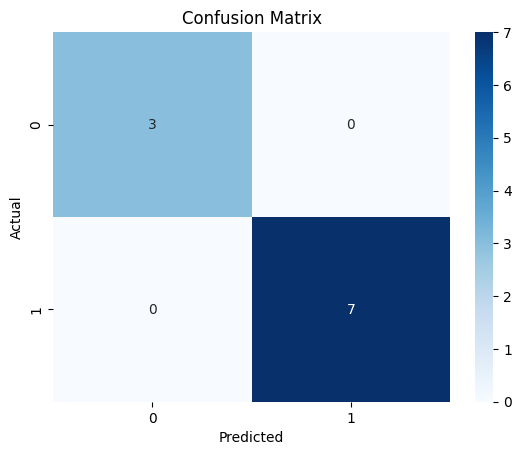

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_pred_test, y_test)

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Visualize the sigmoid probabilities

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


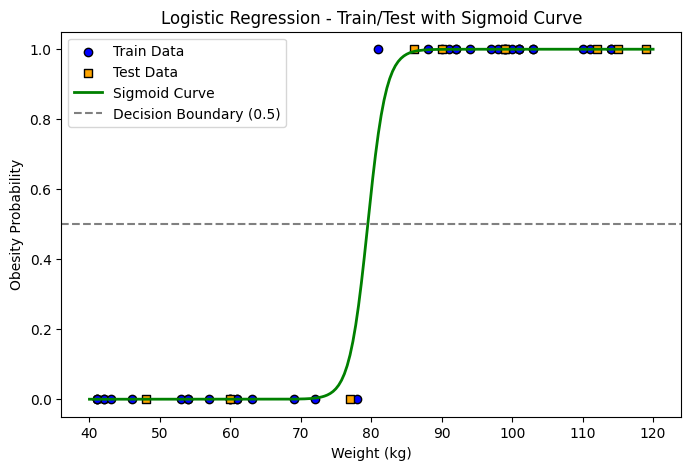

In [ ]:
# 6) Predict probabilities (sigmoid values for curve)
X_range = np.linspace(40, 120, 200).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]

# 7) Plot sigmoid curve with train/test points
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, c="blue", edgecolor="k", label="Train Data")
plt.scatter(X_test, y_test, c="orange", edgecolor="k", marker="s", label="Test Data")
plt.plot(X_range, y_prob, color="green", linewidth=2, label="Sigmoid Curve")
plt.axhline(0.5, color="gray", linestyle="--", label="Decision Boundary (0.5)")
plt.xlabel("Weight (kg)")
plt.ylabel("Obesity Probability")
plt.title("Logistic Regression - Train/Test with Sigmoid Curve")
plt.legend()
plt.show()


#Manual Interpretation using linear score + sigmoid

In [ ]:
X_test

,weight
13,77
39,112
30,86
45,48
17,60
48,99
26,119
25,99
32,90
19,115


In [ ]:
model.predict_proba(X_test)

array([[8.72383786e-01, 1.27616214e-01],
       [1.48021595e-11, 1.00000000e+00],
       [6.79833487e-03, 9.93201665e-01],
       [1.00000000e+00, 3.16480505e-11],
       [9.99999684e-01, 3.15933474e-07],
       [3.18306438e-07, 9.99999682e-01],
       [6.88338275e-14, 1.00000000e+00],
       [3.18306438e-07, 9.99999682e-01],
       [3.17792861e-04, 9.99682207e-01],
       [1.48081547e-12, 1.00000000e+00]])

In [ ]:
model.coef_

array([[0.76738423]])

In [ ]:
model.intercept_

array([-61.01078741])

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def linear_function(weight):
    z = 0.767 * weight - 61.01
    y = sigmoid(z)
    return y

In [ ]:
weight = 80
linear_function(weight)

0.5866175789173304